# **TAREA 4**
Juan José Ruiz Ruiz - ID:8959602

# Predator–Prey Models: A Review of Some Recent Advances

## Sistemas Lotka-Volterra

Ecuaciones diferenciales polinómicas de segundo grado

$x(t)$ y $y(t)$ como las densidades de presas y depredadores, y asumiendo comportamientos lineales y tomando constantes positivas $a, b, c$ y $d$, estableció el siguiente modelo:

$$x' = x(a - by)$$
$$y' = y(-c + dx)$$

### Simulación

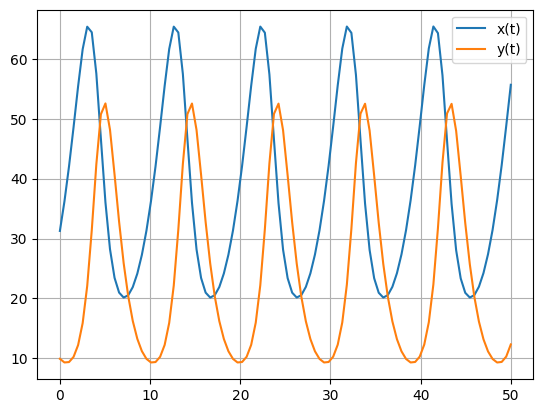

In [208]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, u):
    x, y = u
    dxdt = x * (0.4698 - 0.0188 * y)
    dydt = y * (-0.9978 + 0.0259 * x)
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='x(t)')
    plt.plot(t, y_values, label='y(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([31.27, 9.91])
a = 0
b = 50
n = 100

t, u = runge_kutta4(u0, a, b, n)


Tomado de: https://repository.eafit.edu.co/bitstream/handle/10784/29851/El%20modelo%20depredador-presa%20de%20Lotka-Volterra%20en%20las%20especies%20de%20lince%20canadiense%20y%20liebres%20raqueta%20de%20nieve.pdf?sequence=2&isAllowed=y

## Efecto Allee

Ocurre cuando la población de una especie tiene una densidad muy baja, lo que dificulta su reproducción o supervivencia.

Existen dos tipos de efecto Allee según la naturaleza de la dependencia de la densidad a bajas densidades: 

- Efecto Allee fuerte
Tiene un tamaño o densidad poblacional crítica por debajo de la cual la tasa de crecimiento de la población se vuelve negativa. Entonces, cuando la densidad o tamaño de la población está por debajo de este umbral, la población se extinguirá.

- Efecto Allee débil.
Tiene una tasa de crecimiento per cápita reducida a una densidad o tamaño poblacional más bajo, pero incluso en esta baja densidad o tamaño poblacional, la población siempre mostrará una tasa de crecimiento per cápita positiva.

La modificación más común es utilizar un factor multiplicativo, en cuyo caso la ecuación para una sola especie se da por:

$$x' = r \frac{1 − x}{K}(x − m)x$$

donde:
- $r$ es la tasa de crecimiento intrínseca.
- $K$ es la capacidad de carga ambiental.
- $m$ es el umbral de Allee.

Se dice que el efecto Allee es fuerte si $m > 0$ y débil si $m ≤ 0$. Para el efecto Allee fuerte, la tasa de crecimiento per cápita es negativa para "x" en el intervalo (0, m), lo que implica la extinción de la población.


### Simulación Allee fuerte y debil

m>0


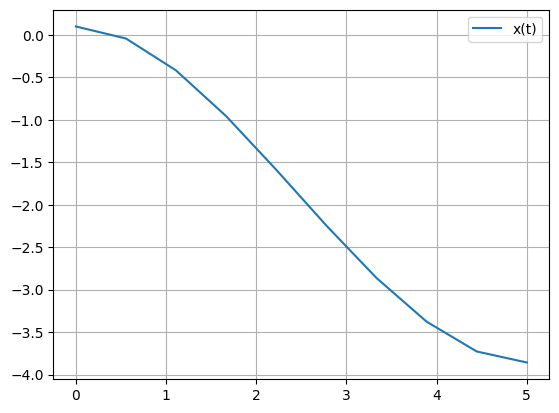

m<0


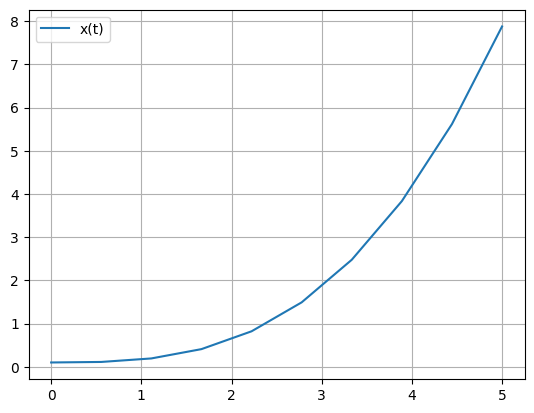

In [209]:
def f(x, t,m):
    r = 0.2
    k = 50
    dxdt =  r*(1-x/k) * (x-m)*x
    return dxdt

def runge_kutta4(u0, a, b, n,m):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros(n)
    u[0] = u0
    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1],m)
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1,m)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2,m)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3,m)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values = u
    plt.plot(t, x_values, label='x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = 0.1
a = 0
b = 5
n = 10

print("m>0")
t, u = runge_kutta4(u0, a, b, n, 5)

print("m<0")
t, u = runge_kutta4(u0, a, b, n, -0.03)

### Primera aproximación Allee

Primero, se considera el siguiente sistema:

$$x' = rx(1 − x) − axy,$$
$$y' = ay(x − y)$$

donde $x$ representan el número de individuos de la población de presas y $y$ el número de individuos de la población de depredadores.

Los puntos de equilibrio son: $(0, 0), (1, 0)$ y $(x*, y*) = (\frac{r}{a + r}, \frac{r}{a + r})$. El equilibrio en los ejes es inestable y el equilibrio positivo es localmente asintóticamente estable. 

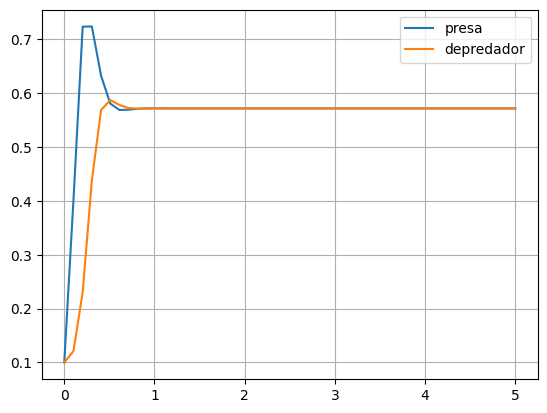

In [210]:
def f(t, u):
    x, y = u
    r = 20
    a = 15
    dxdt = r *x *(1 - x)-a*x*y
    dydt = a*y* (x-y)
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1,0.1])
a = 0
b = 5
n = 50

t, u = runge_kutta4(u0, a, b, n)


### Segunda aproximación Allee

Cuando se tiene en cuenta el efecto Allee se considera el siguiente sistema:

$$x' = r\alpha(x)x(1 − x) − axy,$$
$$y' = ay(x − y)$$

donde $\alpha(x) = \frac{x}{β + x}$ representa el efecto Allee y β > 0 se llama la "constante del efecto Allee". A medida que β aumenta, el efecto Allee existente en la población es más fuerte y el crecimiento de la población de esa especie disminuye.

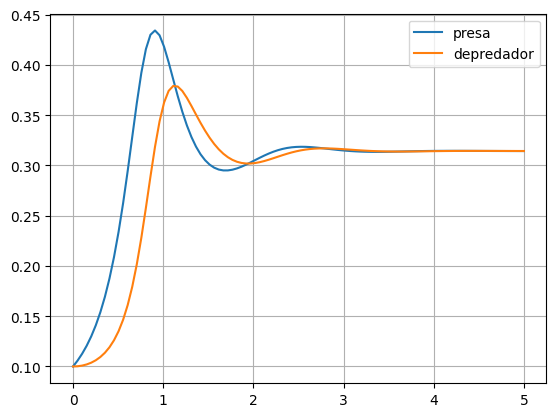

In [211]:
def f(t, u):
    x, y = u
    r = 20
    a = 15
    dxdt = r * (x /(x+0.6))* x*(1 - x) - a*x*y
    dydt = a * y * (x - y)
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 5  
n = 100

t, u = runge_kutta4(u0, a, b, n)


La función $α(x)$ debe cumplir algunas condiciones: 
- $α₀(x)$ debe ser positiva para cualquier $x$ positivo porque el efecto Allee disminuye a medida que la densidad aumenta, 
- $\lim_{x→\infty} α(x) = 1$ porque el efecto Allee desaparece a densidades altas.
- $α(0)$ debe ser cero porque la reproducción no es posible sin ningún individuo, pero como la tasa de crecimiento neto es $xα(x)$, la condición $α(0) = 0$ no es necesaria, ya que $xα(x)$ siempre es cero si x = 0, independientemente del valor de $α(0)$.

$α(x) = \frac{x}{β + x}$ cumple con un conjunto de condiciones específicas relacionadas con el efecto Allee en poblaciones. 

Dos de los equilibrios son iguales a los de un sistema sin efecto Allee (0, 0) y (1, 0), mientras que el tercer equilibrio tiene una nueva expresión $(x∗, y∗) = ((r − aβ)/(a + r), (r − aβ)/(a + r))$. SEl equilibrio (x∗, y∗) solo tiene significado biológico si $r − aβ$ es positivo.

El efecto Allee puede hacer que no haya un equilibrio en el cuadrante positivo, mientras que en el modelo clásico esta singularidad siempre existe, y además es localmente asintóticamente estable. En el caso en que el efecto Allee no afecte a la existencia de equilibrios, también tiene consecuencias en la dinámica del modelo; por un lado, el sistema tarda mucho más tiempo en alcanzar el estado de equilibrio, y por otro lado, los valores de densidad de población tanto de presas como de depredadores en ese punto se reducen con respecto al modelo clásico.

### Tercera aproximación Allee

El efecto Allee afecta a la población de depredadores en lugar de a las presas, basándose en la razón de que es más probable que los niveles más altos en la cadena alimentaria se extingan Considerando la misma función α, pero en este caso como función de la densidad de depredadores:

$$x' = rx(1 − x) − axy$$
$$y' = aα(y)y(x − y)$$

- El sistema es persistente bajo la condición $r > a$ 
- los equilibrios en los ejes, (0, 0) y (1, 0), son inestables
- (x∗, y∗) = (r(1 − x)/a, r(1 − x)/a) es localmente asintóticamente estable

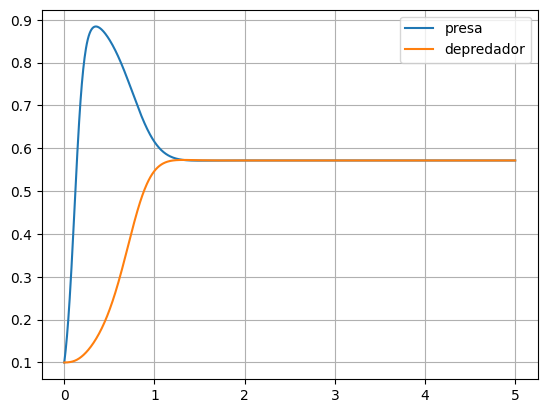

In [212]:
def f(t, u):
    x, y = u
    r = 20
    a = 15
    dxdt = r *x*(1 - x) - a*x*y
    dydt = a *(y/(y+0.6))*y*(x - y)
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 5  
n = 1000

t, u = runge_kutta4(u0, a, b, n)

Las simulaciones numéricas muestran que el sistema con efecto Allee en los depredadores tarda mucho más tiempo en alcanzar su equilibrio positivo, lo que coincide con los resultados en el caso del efecto Allee en la especie de presa.

### Aproximación 4

$$x' = x(\frac{a_1}{b_1+c_1x}-d_1-e_1)-axy$$
$$y' = \frac{ay}{\beta+y} y(x − y)$$

El sistema es permanente, la condición es que: 
$$ \frac{a_1}{b_1} = d_1 + \frac{(a_1/b_1)-d_1}{e_1}

Los puntos de equilibrio en los ejes son inestables, y el equilibrio positivo, que aparece si $a_1 > b_1d_1$, siempre es localmente asintóticamente estable y globalmente asintóticamente estable si se cumple la condición de permanencia.

### Aproximación 5

$$x'=g(x)(f(x)-y),$$
$$y'=y(g(x)-d)$$

Con las condiciones de que
- $f \in C^1, f(b)=f(1)=0.$ Existe $λ ∈ (b, 1)$ tal que $f'(x)> 0$ en $[b, λ]$ y $f'(x)< 0$ en $ [λ, 1].$ 

- $g \in C^1,g(0)=0, g'(x)>0$ y existe $λ > 0$ tal que $g(λ) = d. $

La función $g$ es la respuesta funcional del depredador y $g(x)f(x)$ es la tasa de crecimiento neto de la presa.

Las hipótesis sobre $f$ reflejan que en ausencia del depredador, la presa tiene un fuerte efecto Allee en su crecimiento. El parámetro b es el umbral de supervivencia o constante de escasez de la presa. El parámetro d es la tasa de mortalidad del depredador.

λ es una medida de cuán bien adaptado está el depredador a la presa.

Existen cuatro equilibrios posibles: $(0, 0), (1, 0), (b, 0) y (λ, f(λ))$

### Aproximación 6 - Leslie-Gower

El crecimiento del depredador se describe mediante una ecuación de tipo logístico y la capacidad de carga ambiental de los depredadores es una función de la población de presas, f(x) = nx. El modelo de Leslie-Gower tiene solo un equilibrio positivo que es asintóticamente estable.

$$x' = (r(1-\frac{x}{K})(x-m)-qy)x$$
$$y' = s(1-\frac{y}{nx})y$$

definido en (0, ∞] × [0, ∞]. El parámetro m es el umbral de Allee o mínimo de población viable, consideran m ∈ [0, K), lo que resulta en un efecto Allee débil cuando m = 0 y en un efecto Allee fuerte en cualquier otro caso. En el caso con un efecto Allee fuerte, es decir, con M > 0, el equilibrio (M, 0) es un punto repelente hiperbólico y (1, 0) es un punto silla hiperbólico. 

El modelo es sensible a las condiciones iniciales.

En el caso con un efecto Allee débil, es decir, con M = 0, los puntos de equilibrio (0, 0) y (1, 0) son un punto de silla no hiperbólico y un punto de silla, respectivamente. Además, existe un equilibrio positivo único si y solo si Q < 1.

Esto muestra que el efecto Allee puede desestabilizar un modelo depredador-presa

### Aproximación 7 - Efecto Allee doble

$$x' = (\frac{r}{x+n}(1-\frac{x}{K})(x-m)-qy)x$$
$$y' = (px-c)y$$

El efecto Allee se expresa una vez en el factor α(x) = x - m, y una segunda vez en el término r(x) = rx/(x + n), que puede interpretarse como una aproximación de una dinámica de población donde las diferencias entre fértiles y no fértiles no se modelan explícitamente

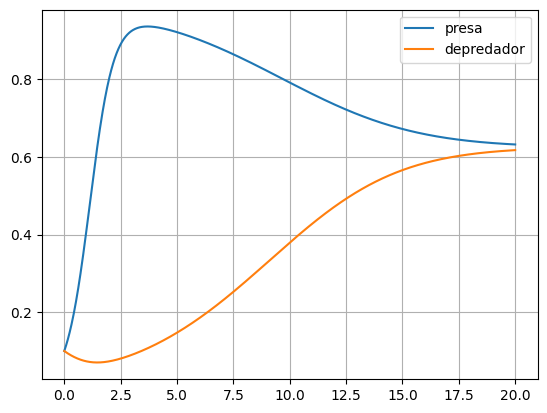

In [213]:
def f(t, u):
    x, y = u
    r = 2
    n = 2
    k = 1
    m = -2
    q = 1.2
    p = 0.8
    c = 0.5
    dxdt = ((r/(x+n)) *(1 - x/k) * (x-m)-q*y)*x
    dydt = (p*x-c)*y
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 20 
n = 1000

t, u = runge_kutta4(u0, a, b, n)

### Aproximación 8 - Efecto Allee único

$$x' = (r(1-\frac{x}{K})(x-m)-qy)x$$
$$y' = (px-c)y$$

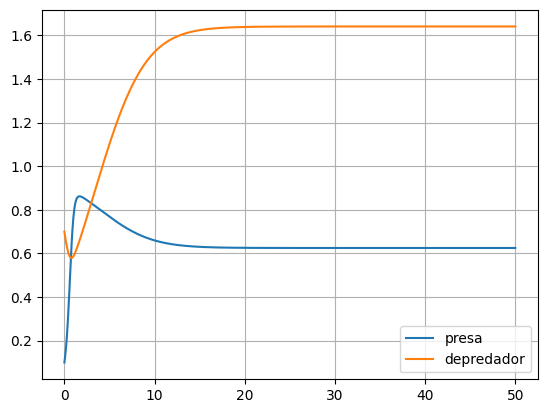

In [214]:
def f(t, u):
    x, y = u
    r = 2
    n = 2
    k = 1
    m = -2
    q = 1.2
    p = 0.8
    c = 0.5
    dxdt = (r *(1 - x/k) * (x-m)-q*y)*x
    dydt = (p*x-c)*y
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.7]) 
a = 0
b = 50
n = 1000

t, u = runge_kutta4(u0, a, b, n)

Para la aproximación 7 siempre existen tres equilibrios, dos de ellos en el límite. En el caso con un fuerte efecto Allee, existe otro equilibrio en el límite. La existencia de un conjunto de valores de parámetros para los cuales existen dos ciclos límite cuando el efecto Allee es fuerte o débil en aproximación 7. Este es un resultado diferente en comparación con el sistema de la aproximación 8, generado por el doble efecto Allee, porque el sistema tiene un único ciclo límite generado por bifurcación de Hopf, que rodea el único equilibrio positivo.

En la aproximación 7 para un mismo conjunto de parámetros, son posibles diferentes comportamientos: la extinción de ambas poblaciones, la coexistencia y la oscilación de ambas poblaciones.

### Aproximación 9

Consideran depredadores generalistas, es decir, aquellos que se alimentan no solo de la especie de presa. La especie depredadora está sujeta a un efecto Allee.

Muestran que aumentar la capacidad de carga de las presas ayuda a la población a sobrevivir en un equilibrio de coexistencia. Su modelo puede producir dinámicas biestables para un rango razonable de valores de parámetros. La dinámica obtenida es bastante rica y existen diferentes tipos de bifurcaciones. El sistema que consideran es:

$$x' = r_1x(1 − \frac{x}{k_1})-\frac{axy}{1 + ahx},$$ 
$$y' = r_2y(1 − \frac{y}{k_2})(y-m) + \frac{eaxy}{1 + ahx}$$

Este sistema tiene el equilibrio trivial E0 = (0, 0) y tres equilibrios en los límites E1 = (1, 0), E2 = (0, l) y E3 = (0, η).

La dinámica del sistema depredador-presa puede ser muy compleja incluso en sistemas con solo dos especies. El sistema presa-depredador con un depredador generalista tiene propiedades biológicas más sensatas, ya que la extinción de la presa no conduce a la extinción del depredador.

## La influencia del efecto del miedo

La forma de vida de las presas influye en la evolución del ecosistema, por ejemplo, cuando las presas, conscientes de la presencia de sus depredadores, sienten miedo y actúan en consecuencia, dificultando la caza para los depredadores. Este hecho lleva a las presas a evitar la depredación directa, lo que puede aumentar la supervivencia a corto plazo de las presas, pero puede causar una disminución a largo plazo de la población de presas como consecuencia.

### Primer modelo -  X. Wang, L. Zannete y X. Zou

Este modelo modifica un modelo clásico de depredador-presa multiplicando el término de producción por un factor f(s, y) relacionado con el costo de la defensa antidepredadora debida al miedo. El parámetro s representa el nivel de miedo.

$$x' = rx f(s, y) − dx − ax^2 - g(x)y,$$
$$y' = y(−n + cg(x))$$

Se consideran dos tipos de respuestas funcionales: una respuesta funcional tipo Holling I o respuesta lineal, g(x) = xp, y una respuesta funcional tipo Holling II, g(x) = xp/(1 + qx).

Se asume que los depredadores se alimentan exclusivamente de esta especie de presa, solo aparecen dos equilibrios en los límites.

#### Holling II

$$f(s,y)=\frac{1}{1+sy}$$

Otras aproximaciones numéricas implican que 
$f(s, y) = e^{−sy}$ y $f(s, y) = \frac{1}{1 + s_1y + s_2y^2}$

Los riesgos percibidos de depredación solo reducen la tasa de natalidad y la supervivencia de las crías, y no incluye el posible impacto en la tasa de mortalidad de las presas adultas.



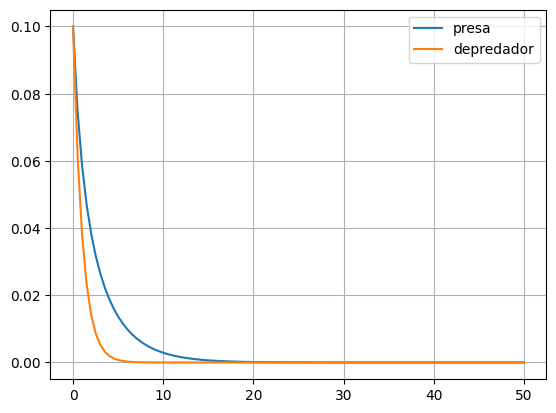

In [215]:
def f(t, u):
    x, y = u
    r = 0.5
    d = 0.8
    a = 1.5
    p = 0.6
    c = 0.8
    n = 1
    s = 3
    d1 = 0.8
    dxdt = (r*x)/(1+s*y) - d*x - a*x*x - (x*p)*y
    dydt = y*(-n + c*(x*p))
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 50 
n = 100

t, u = runge_kutta4(u0, a, b, n)

Extinción de ambas especies

### Segundo modelo - Z. Zhu, R. Wu, L. Lai y X. Yu

Los depredadores son omnívoros. Se asume que los depredadores pueden alimentarse de otras especies, especialmente cuando la especie de presa principal se extingue.

$$x' = \frac{rx}{1 + sy} − dx − ax^2 − pxy,$$
$$y' = cpxy + ny − d1y^2$$

Dependiendo de los valores de los parámetros, el sistema puede exhibir cuatro equilibrios. Dos de ellos son los equilibrios en el límite que también aparecieron en el sistema sin depredadores omnívoros, E0 y E1, y ahora aparece un nuevo equilibrio en el límite E2 = (0, n/d1), porque los depredadores pueden sobrevivir en ausencia de presas. Aquí, los puntos de equilibrio E0 y E1 son inestables, el equilibrio E2 es globalmente asintóticamente estable bajo ciertas condiciones, lo que muestra que la especie de depredador puede ser permanente a pesar de la extinción de la especie de presa. Cuando existe el equilibrio positivo, es globalmente asintóticamente estable, como en el caso sin depredadores omnívoros.


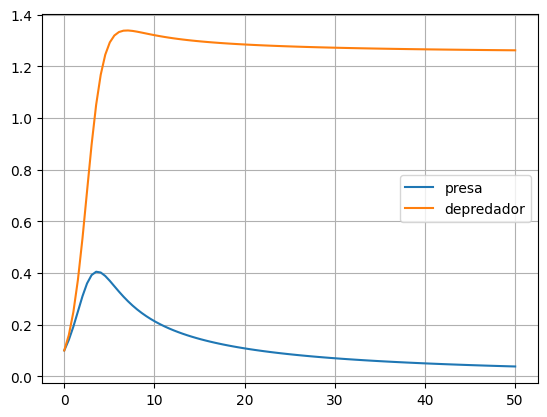

In [216]:
def f(t, u):
    x, y = u
    r = 1.6
    d = 0.8
    a = 0.2
    p = 0.3
    c = 0.8
    n = 1
    s = 0.3
    d1 = 0.8
    dxdt = (r*x)/(1+s*y) - d*x - a*x*x - p*x*y
    dydt = c*p*x*y + n*y - d1*y*y
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 50 
n = 100

t, u = runge_kutta4(u0, a, b, n)

### Tercer model S. Pal, N. Pal, S. Samantha y J. Chattopadhyay

Consideran un modelo modificado de depredador-presa de Leslie-Gower en el que los depredadores cooperan durante la caza y debido al temor al riesgo de depredación, las poblaciones de presas muestran comportamientos antipredatorios.

$$x'= x(\frac{b}{1 + βy}− d − x −\frac{(1 + αy)y}{p + (1 + αy)x}),$$
$$y' = y(1 −\frac{qy}{r + (1 + αy)x})$$

El sistema es permanente si b / (1 + βM2) − d − M2(1 + αM2) / p > 0, donde M2 es el límite superior de la población de depredadores.

El modelo tiene los siguientes equilibrios en el límite: E0 = (0, 0), E1 = (b − d, 0) y E2 = (0, r/q). También puede presentar un equilibrio positivo E∗ = (x∗, y∗). Los puntos de equilibrio E0 y E1 son inestables.

En ausencia de miedo, si aumentamos la fuerza de cooperación en la caza, entonces el sistema se vuelve inestable alrededor del equilibrio positivo y experimenta múltiples bifurcaciones de Hopf.

El factor de miedo tiene un efecto estabilizador y, al incluirlo, el sistema estable permanece estable y el sistema oscilante se vuelve estable al excluir la existencia de órbitas periódicas. Se observa que el factor de miedo tiene un efecto estabilizador mayor que la cooperación en la caza y hace que el sistema sea más robusto.


### Modelo S. K. Sasmal

Modelo con una reducción de la tasa de crecimiento de las presas debido al efecto del miedo y con la especie de presa afectada por el efecto Allee. Este modelo se expresa de la siguiente manera:

$$x' = rx (1 - x/K) (x - m) / (1 + sy) - axy$$
$$y' = aαxy - ny$$

donde $s$ representa el efecto del miedo y $m$ el efecto Allee.

El sistema presenta tres equilibrios en el límite que siempre existen: E0 = (0, 0), E1 = (m, 0) y E2 = (K, 0), y un equilibrio positivo E∗ que aparece bajo la condición m < n / (aα) < s.

El origen es asintóticamente estable, por lo que siempre existen algunas condiciones iniciales que llevarán a la extinción de ambas especies. Debido a los efectos de Allee fuertes en las presas, cuando la invasión de los depredadores es lo suficientemente grande, entonces los depredadores crecen muy rápido para llevar a las presas por debajo de su densidad de supervivencia, y la extinción de ambas poblaciones es segura.

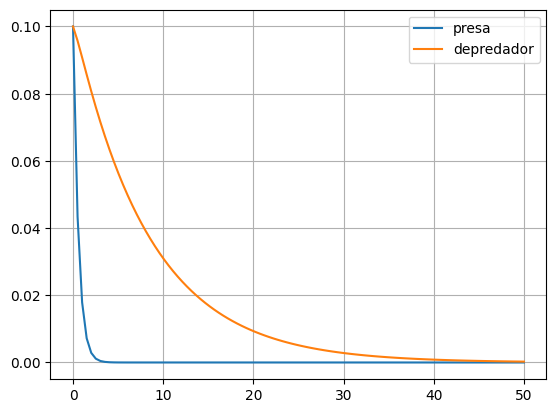

In [217]:
def f(t, u):
    x, y = u
    r = 1
    m = 2
    s = 1.5
    a = 1
    k = 1
    alpha = 0.5
    n = 0.12
    dxdt = r*x*(1-x/k)*(x-m)*(1/(1+s*y))-a*x*y
    dydt = a*alpha*x*y - n*y
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 50 
n = 100

t, u = runge_kutta4(u0, a, b, n)

### Modelo L. Lai, Z. Zhu and F. Chen

$$x' = rx(1 − x − \frac{m}{x + b})\frac{1}{1 + sy}-axy,$$
$$y' = aαxy − ny$$

El término 1/(1 + sy) representa el efecto del miedo y el término m/(x + b) representa el efecto de Allee aditivo.

Dependiendo de los parámetros, el sistema puede presentar dos o tres puntos de equilibrio en el límite. El origen E0 es siempre un equilibrio para el sistema. Es un nodo estable si b < m o b = m = 1, un punto de silla si b = m ≠ 1 y una silla si b > m. Cuando b ∈ (0, 1) y b < (b + 1) 2/4 < m, no existen más equilibrios en el límite.

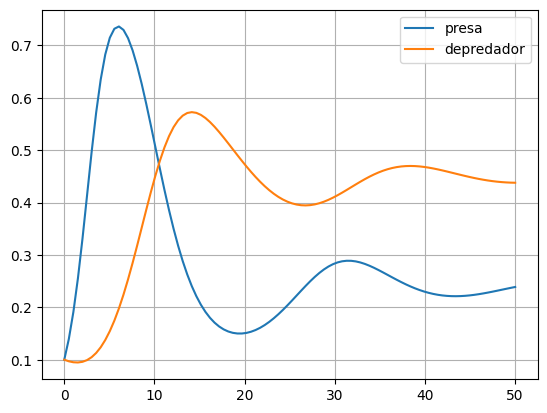

In [218]:
def f(t, u):
    x, y = u
    r = 1
    m = 0.25
    s = 1.5
    a = 1
    k = 1
    alpha = 0.5
    n = 0.12
    b = 20
    dxdt = r*x*(1-x-m/(x+b))*(1/(1+s*y))-a*x*y
    dydt = a*alpha*x*y - n*y
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 50 
n = 100

t, u = runge_kutta4(u0, a, b, n)

### Modelo H. Zhang, Y. Cai, S. Fu and W. Wang

Incorpora el efecto del miedo y un refugio para las presas. Sus resultados muestran que el impacto del refugio para las presas y el efecto del miedo es significativo.

$$x'=αx(1− \frac{x}{k})− \frac{β(1−m)xy}{1+a(1-m)x},$$
$$y =−γy+ \frac{cβ(1−m)xy}{1+a(1−m)x}$$

El origen E0 = (0, 0) siempre es un equilibrio para el sistema y siempre es un punto de silla. También existe un equilibrio de frontera E1 = (α/b, 0) que siempre está presente. Este equilibrio es localmente asintóticamente estable si cβ - aγ ≤ 0 o cβ - aγ > 0 y 1 - bγ/α(cβ - aγ) < m < 1, por lo que bajo estas condiciones existe una región desde la cual el sistema siempre tiende a la extinción de la especie depredadora. E1 es inestable si cβ - aγ > 0 y 0 ≤ m < 1 - bγ/α(cβ - aγ). Cabe destacar que estas condiciones no dependen del parámetro s, es decir, no dependen del efecto del miedo. 

Cuando el equilibrio de coexistencia existe, el aumento del parámetro de miedo s provoca una disminución de la densidad de depredadores, pero no induce la extinción.

El efecto del miedo puede aumentar la estabilidad del sistema, ya que puede prevenir la existencia de ciclos límite.

En cuanto al refugio de las presas, cuando $(m \in [0, 1 - 2b\gamma/\alpha(c\beta - a\gamma))]$, con el aumento de s la densidad de depredadores cambia de aumento a disminución. Cuando m alcanza un umbral de alto riesgo de refugio para las presas, el depredador se extingue.

### Modelo - Sasmal

El modelo incorpora al mismo tiempo el efecto Allee y el refugio de las presas.

$$x' = rx(1 − \frac{x}{K})(x-m)\frac{1}{1 + sy}− a(1 − η)xy,$$
$$y˙ = aα(1 − η)xy − ny$$

donde η ∈ (0, 1) es la constante de refugio de las presas, por lo que ηx(t) representa la capacidad del refugio en el tiempo t. Si lo comparamos con el modelo anterior incluido en esta revisión, estamos agregando el efecto Allee además del efecto del miedo y el refugio de las presas.

El origen siempre es un equilibrio, particularmente, un nodo estable. También existen dos equilibrios en el límite, E1 = (K, 0) y E2 = (m, 0). E1 puede ser un punto de silla, un nodo silla atractivo o localmente asintóticamente estable, dependiendo de la relación entre el parámetro η y n/aαb. De manera similar, E2 puede ser un nodo silla repulsivo o un punto de silla, dependiendo de la relación entre el parámetro η y n/aαm.

El efecto del miedo y el efecto Allee no afectan la densidad final de las presas en el equilibrio de coexistencia, pero pueden provocar una disminución en la población de depredadores.

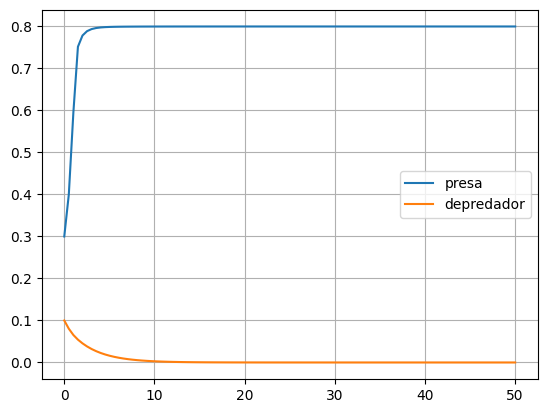

In [219]:
def f(t, u):
    x, y = u
    r = 2
    k = 0.2
    m = 0.8
    s = 1
    a = 1.2
    alpha = 0.8
    n = 0.5
    n1 = 0.8
    dxdt = r*x*(1-x/k)*(x-m)*(1/(1+s*y))-a*(1-n1)*x*y
    dydt = a*alpha*(1-n1)*x*y - n*y
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.3, 0.1]) 
a = 0
b = 50 
n = 100

t, u = runge_kutta4(u0, a, b, n)

## Canibalismo

Es el acto de matar y al menos consumir parcialmente a individuos de la misma especie. Ha sido principalmente considerado en las especies depredadoras, y en general, los resultados concuerdan en que este canibalismo estabiliza el sistema y causa la persistencia en una población condenada a extinguirse.

### Modelo H. Deng, F. Chen, Z. Zhu y Z. Li 

$$x' = x(b − αx − my),$$
$$y' = y(−β + c_1 + nx) − \frac{cy^2}{y + d}$$

donde $c_1 < c $ y $cy^2/(y + d)$ denota el canibalismo del depredador.

Hay dos equilibrios que siempre existen, el origen E0 y el equilibrio de frontera E1 = (b/α, 0), y otro equilibrio de frontera E2 = (d(c1 - β)/(β + c - c1) que existe si c1 > β. Un equilibrio de coexistencia E* = (x2, y2) existe si 0 < β - c1 < bn/α o si β ≤ c1 < β + bc/(b + dm), donde x2 = B - √(B2 - 4AC) / (2A) y y2 = (b - αx*2) / m, con A = αn, B = α(β + c - c1) + bn + dmn y C = b(β + c - c1) + dm(β - c1).

cuando el sistema original de Lotka-Volterra está en condiciones en las que existe un equilibrio de coexistencia que es globalmente asintóticamente estable, a medida que aumenta el parámetro asociado al canibalismo, la población de presas aumenta y la población de depredadores disminuye. De esta manera, cuando se alcanza cierto valor de este parámetro, el canibalismo provoca la extinción de los depredadores.

### Modelo A. Basheer, E. Quansah, S. Bhowmick and R. D. Parshad

Considerar el primer modelo de EDO con dos especies y canibalismo de presas

$$x' = x(1 − x) − \frac{xy}{x + αy},$$
$$y' = δy(β − \frac{y}{x})$$

con los sistemas obtenidos al agregar canibalismo en la especie depredadora o en la especie de presa.

Para el sistema original, si  β < 1/(1 − α), entonces existe un equilibrio positivo en
(1 − β/(1 + αβ), β(1 − β/(1 + αβ)))

Al considerar la inclusión del canibalismo de los depredadores, se obtiene el sistema:

$$x' = x(1 − x) −\frac{xy}{x + αy},$$
$$y' = δy(β1 −\frac{y}{γx + cy})$$

Aquí, la fuente de alimento de los depredadores está representada por γx+cy, donde cy es el término de canibalismo. 

Hay un equilibrio $(x∗, y∗) = (1 − β1γ/(αβ1γ − cβ1 + 1), γβ1/(1 − β1c))$ si $γ < 1, 1 − β1c > 0$ y $αγ − γ + 1/β1 > c$

Ahora, con la inclusión del canibalismo de las presas en lugar del canibalismo de los depredadores, se obtiene el sistema:

$$x' = x(1 + c1 − x) −\frac{xy}{x + αy}− c\frac{x^2}{x + d},$$
$$y˙ = δy(β −\frac{y}{x})$$

Hay un equilibrio  $(x∗, y∗) =(\frac{−(m + d + c − c1 − 1) + \sqrt{(m + d + c − c1 − 1)^2 + 4d(1 − m) + 4dc1}}{2}, βx^∗)$ 

El equilibrio positivo del sistema es inestable, por lo que tiene un efecto desestabilizador.


## Inmigración

### Modelo de Rosenzweig-MacArthur

$$x' = rx(1 −\frac{x}{K})−\frac{xy}{a + x}+ c,$$
$$y' = y(\frac{µx}{a + x} − d)$$

donde la migración de la presa está dado por $c\leq 0$

El origen no es un punto de equilibrio y existe un equilibrio en el límite E1 = (K/2 + √(K/2 + cK/r)). Bajo ciertas condiciones, µ > d y K > rλ^2/(rλ + c), existe un equilibrio positivo E∗(λ, µ(rλ(1 − λ/K) + c)/d). En cualquier otra condición, no existe un equilibrio positivo ni ciclos límite.

Si K > λ, existe un equilibrio positivo (para cualquier valor de c).

Se considera el sistema modificado con poca inmigración de depredadores y presas. Analizan la estabilidad asintótica del sistema de depredadores y presas, pero agregan un factor de inmigración $c_1(x)$ en la población de presas y $c_2(x)$ en la población de depredadores, por lo que estudian el sistema:

$$x' = rx - axy + c_1(x),$$
$$y' = bxy + ny + c_2(y)$$



#### SImulacion sin inmigración

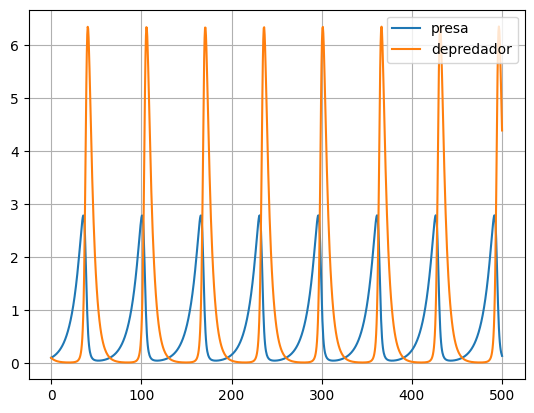

In [220]:
def f(t, u):
    x, y = u
    r = 0.1
    a = 0.1
    b = 0.3
    n = 0.2
    c1 = 0
    c2 = 0
    dxdt = r*x- a*x*y + c1
    dydt = b*x*y - n*y + c2
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 500
n = 1000

t, u = runge_kutta4(u0, a, b, n)

#### Simulación con inmigración en las presas

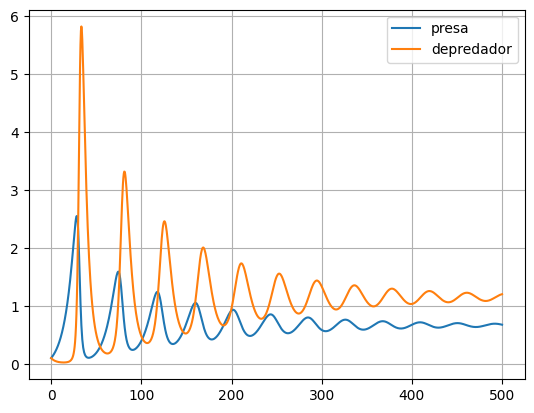

In [221]:
def f(t, u):
    x, y = u
    r = 0.1
    a = 0.1
    b = 0.3
    n = 0.2
    c1 = 0.01
    c2 = 0
    dxdt = r*x- a*x*y + c1
    dydt = b*x*y - n*y + c2
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 500
n = 1000

t, u = runge_kutta4(u0, a, b, n)

#### Simulación con inmigración en los depredadores

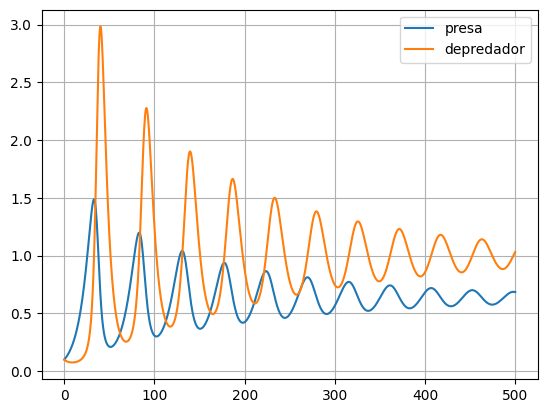

In [222]:
def f(t, u):
    x, y = u
    r = 0.1
    a = 0.1
    b = 0.3
    n = 0.2
    c1 = 0
    c2 = 0.01
    dxdt = r*x- a*x*y + c1
    dydt = b*x*y - n*y + c2
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 500
n = 1000

t, u = runge_kutta4(u0, a, b, n)

#### Simulación con inmigración en presas y depredadores

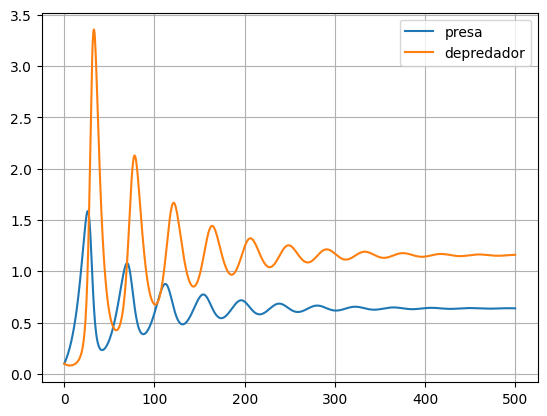

In [223]:
def f(t, u):
    x, y = u
    r = 0.1
    a = 0.1
    b = 0.3
    n = 0.2
    c1 = 0.01
    c2 = 0.01
    dxdt = r*x- a*x*y + c1
    dydt = b*x*y - n*y + c2
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, label='presa')
    plt.plot(t, y_values, label='depredador')
    plt.grid()
    plt.legend()
    plt.show()

    return t, u

u0 = np.array([0.1, 0.1]) 
a = 0
b = 500
n = 1000

t, u = runge_kutta4(u0, a, b, n)

# Parameter estimation of a predator-prey model using a genetic algorithm 


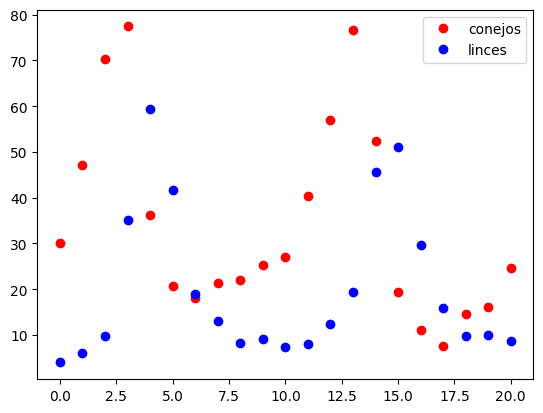

In [224]:
import numpy as np

t = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
x = np.array([30,47.2,70.2,77.4,36.3,20.6,18.1,21.4,22,25.4,27.1,40.3,57,76.6,52.3,19.5,11.2,7.6,14.6,16.2,24.7])
y = np.array([4,6.1,9.8,35.2,59.4,41.6,19,13,8.3,9.1,7.4,8,12.3,19.5,45.7,51.1,29.7,15.8,9.7,10.1,8.6])

plt.plot(t,x,'or', label = "conejos")
plt.plot(t,y,'ob', label = "linces")
plt.legend()
plt.show()

### Método de Runge-Kutta 4

In [225]:
def runge_kutta4(u0, a, b, n,t_data,x_data,y_data):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0
    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x_values, y_values = u[:, 0], u[:, 1]
    plt.plot(t, x_values, '-r',label='conejos')
    plt.plot(t, y_values, '-b',label='linces')
    plt.plot(t_data,x_data,'or', label = 'datos conejos')
    plt.plot(t_data,y_data,'ob', label = 'datos linces')
    plt.grid()
    plt.legend()
    plt.show()

    x_model = np.interp(t_data, u[:, 0], t)
    y_model = np.interp(t_data, u[:, 1], t)
    error = np.linalg.norm(x_data - x_model) + np.linalg.norm(y_data - y_model)
    return t, u,error

## Modelo básico

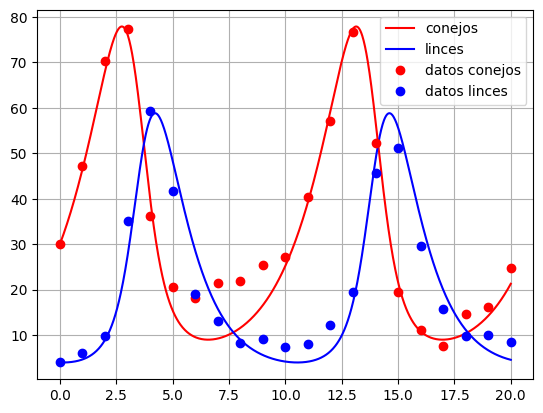

Error: 273.1560062772012


In [226]:
def f(t, u):
    x, y = u
    dxdt = 0.55*x- 0.027*x*y 
    dydt = -0.83*y + 0.026*x*y     
    return np.array([dxdt, dydt])

u0 = np.array([30, 4]) 
a = 0
b = 20
n = 1000

t1, u, error = runge_kutta4(u0, a, b, n, t,x,y)
print("Error:", error)

## Modelo con saturación en las presas

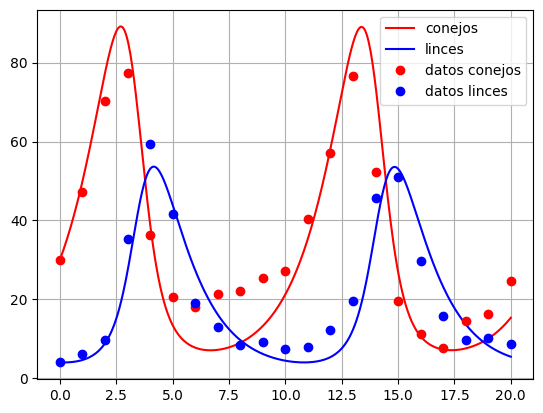

error:  272.7660947856907


In [227]:
def f(t, u):
    x, y = u
    dxdt = 0.65*x*(1-x/71247) - 0.034*x*y 
    dydt = -0.68*y + 0.021*x*y     
    return np.array([dxdt, dydt])

u0 = np.array([30, 4]) 
a = 0
b = 20
n = 500

t, u, error = runge_kutta4(u0, a, b, n, t,x,y)
print('error: ', error)

# ODE

## Modelo básico

[0.4184838  0.02166517 1.02247254 0.03865329]


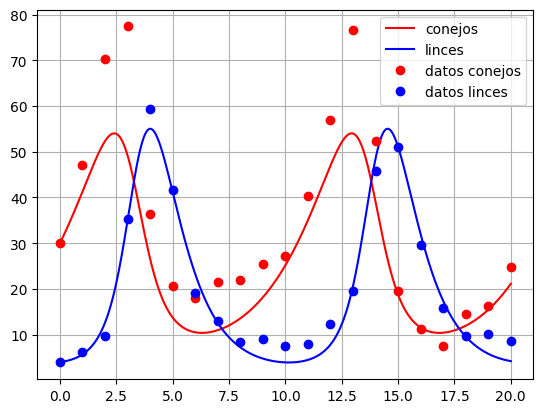

error:  273.33894636414396


In [228]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f1(u, t, a, b, c, d):
    x, y = u
    dxdt = a*x- b*x*y
    dydt = -c*y + d*x*y
    return np.array([dxdt, dydt])

#funcion de error
def error(params):
    a, b, c, d = params
    y_model = odeint(f1, u, t, args=(a, b, c, d))
    error = np.linalg.norm(y - y_model[:, 1])
    return error

# Condiciones iniciales
u = np.array([30, 4])

#datos
t = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
x = np.array([30,47.2,70.2,77.4,36.3,20.6,18.1,21.4,22,25.4,27.1,40.3,57,76.6,52.3,19.5,11.2,7.6,14.6,16.2,24.7])
y = np.array([4,6.1,9.8,35.2,59.4,41.6,19,13,8.3,9.1,7.4,8,12.3,19.5,45.7,51.1,29.7,15.8,9.7,10.1,8.6])

#parámetros calculados en el articulo
parametros_iniciales = [0.55, 0.027, 0.83, 0.026]

#optimizacion
result = minimize(error, parametros_iniciales, method='Nelder-Mead')
p = result.x
print(p)

def f(t, u):
    x, y = u
    dxdt = p[0]*x - p[1]*x*y 
    dydt = - p[2]*y + p[3]*x*y     
    return np.array([dxdt, dydt])

u0 = np.array([30, 4]) 
a = 0
b = 20
n = 500

t, u, error = runge_kutta4(u0, a, b, n, t,x,y)
print('error: ', error)

## Modelo con saturación de presas

[3.90414934e-01 1.91938963e-02 1.10813121e+00 4.27542988e-02
 8.92983886e+02]


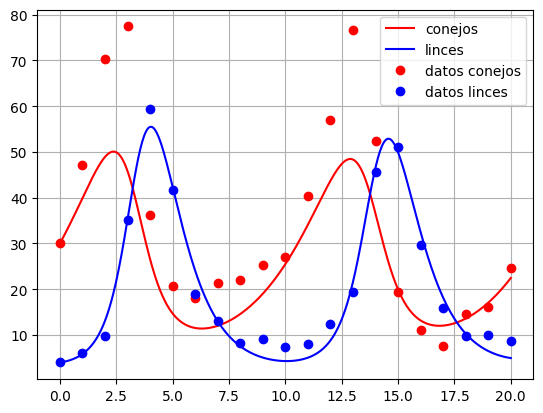

error:  273.33894636414396


In [229]:
def f1(u, t, a, b, c, d,k):
    x, y = u
    dxdt = a*x*(1-x/k)- b*x*y
    dydt = -c*y + d*x*y
    return np.array([dxdt, dydt])

#funcion de error
def error(params):
    a, b, c, d, k= params
    y_model = odeint(f1, u, t, args=(a, b, c, d, k))
    error = np.linalg.norm(y - y_model[:, 1])
    return error

# Condiciones iniciales
u = np.array([30, 4])

#datos
t = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
x = np.array([30,47.2,70.2,77.4,36.3,20.6,18.1,21.4,22,25.4,27.1,40.3,57,76.6,52.3,19.5,11.2,7.6,14.6,16.2,24.7])
y = np.array([4,6.1,9.8,35.2,59.4,41.6,19,13,8.3,9.1,7.4,8,12.3,19.5,45.7,51.1,29.7,15.8,9.7,10.1,8.6])

#parámetros calculados en el articulo
parametros_iniciales = [0.65, 0.034, -0.68, 0.021,71247]

#optimizacion
result = minimize(error, parametros_iniciales, method='Nelder-Mead')
p = result.x
print(p)

def f(t, u):
    x, y = u
    dxdt = p[0]*x*(1-x/p[4]) - p[1]*x*y 
    dydt = - p[2]*y + p[3]*x*y     
    return np.array([dxdt, dydt])

u0 = np.array([30, 4]) 
a = 0
b = 20
n = 500

t, u, error = runge_kutta4(u0, a, b, n, t,x,y)
print('error: ', error)